### Урок 3. Библиотека Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIRECTORY = '/content/drive/My Drive/Informatics/Sphere@mail.ru/1_Data_Analysis/Lec_3/ControlWork/'

### Анализ данных с помощью библиотеки Pandas

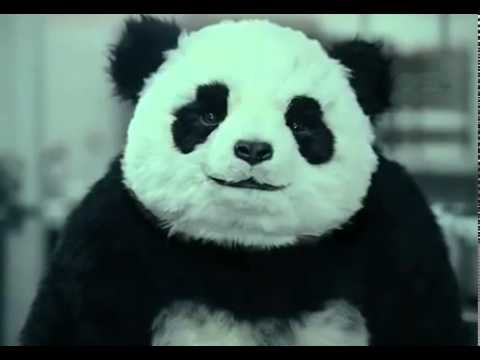

<img width = '400px' src="images/lesson_3/hqdefault.jpg">

**Pandas** это высокоуровневая Python библиотека для анализа данных, построена она поверх более низкоуровневой библиотеки NumPy (написана на Си), что является большим плюсом в производительности. В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных. 

Основными структурами данных в Pandas являются классы **Series** и **DataFrame**.

### Pandas Series

Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

In [ ]:
import pandas as pd
import numpy as np
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [ ]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
my_series.values

array([ 5,  6,  7,  8,  9, 10])

In [ ]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [ ]:
my_series2.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [ ]:
my_series[[4]]

4    9
dtype: int64

In [ ]:
my_series2[['a']]

a    0
dtype: int64

In [ ]:
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

In [ ]:
my_series2[(my_series2 > 0)]

c    7
d    8
e    9
dtype: int64

In [ ]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

In [ ]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

### Pandas DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

In [ ]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [ ]:
df.population

0     17.04
1    143.50
2      9.50
3     45.50
Name: population, dtype: float64

In [ ]:
type(df.population)

pandas.core.series.Series

In [ ]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


**Импорт данных**

In [ ]:
# pd.read_csv('filename')
# pd.read_excel('filename')
# pd.read_sql(query,connection_object) 
# pd.read_table(filename)
# pd.read_json(json_string)
# pd.read_html(url) 
# pd.read_clipboard()
# pd.DataFrame(dict)

In [ ]:
ml = pd.read_csv(DIRECTORY + 'files/lesson_3/meteorite-landings.csv', sep = ',')
ml.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.983330, -115.683330)"


In [ ]:
mailru = pd.read_html('https://mail.ru/')  

Отдельно стоит упомянуть про возможность работы в Pandas с большими файлами, которые могут не помещаться в оперативную память компьютера. Для этого мы можем читать файл небольшими чанками.

In [ ]:
c_size = 10000 

for gm_chunk in pd.read_csv(DIRECTORY + 'files/lesson_3/meteorite-landings.csv', sep = ',',chunksize=c_size):
    print(gm_chunk.shape)

(10000, 10)
(10000, 10)
(10000, 10)
(10000, 10)
(5716, 10)


**Экспорт данных**

In [ ]:
# df.to_csv(filename) 
# df.to_excel(filename) 
# df.to_sql(table_name, connection_object)
# df.to_json(filename)
# df.to_html(filename)
# df.to_clipboard()

**Доступ к данным**

Доступ к строкам по индексу возможен несколькими способами:

- .loc - используется для доступа по строковой метке
- .iloc - используется для доступа по числовому значению (начиная от 0)

In [ ]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [ ]:
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [ ]:
#индекс + колонки
df.loc[['KZ', 'RU'], 'population']

KZ     17.04
RU    143.50
Name: population, dtype: float64

В .loc и .iloc запомнить, что первая часть относится к строкам, вторая - к столбцам.

In [ ]:
df.iloc[[0,1],[1]]

,population
KZ,17.04
RU,143.50


In [ ]:
df[df.population > 10][['country', 'square']]

,country,square
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


In [ ]:
#более сложное условие
df[(df.square > 70000) & (df.country == 'Russia')][['country','square']]

,country,square
RU,Russia,17125191


In [ ]:
# Или так
filters = (df.country == 'Russia')
df[filters]

,country,population,square
RU,Russia,143.5,17125191


In [ ]:
# Создаем новую колонку 
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [ ]:
# Обратить внимание, что при дропе колонок необходимо в том или ином виде перезаписывать данные в исходном датафрейме
df.drop(['density'], axis=1)
# df.drop(['density'], axis='columns',inplace =True)

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [ ]:
df = df.drop(['density'], axis=1)
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [ ]:
df = df.rename(columns={'Country Code': 'country_code'})
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [ ]:
# вытаскивает n самых больших показателей из колонки - нет нужды в сортировке
df.nlargest(3,'population')

,country,population,square
RU,Russia,143.50,17125191
UA,Ukraine,45.50,603628
KZ,Kazakhstan,17.04,2724902


In [ ]:
df.nsmallest(3,'square')

,country,population,square
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628
KZ,Kazakhstan,17.04,2724902


### Работа с данными с помощью Pandas

Источник данных - https://www.kaggle.com/nasa/meteorite-landings.

1).Загрузим исходные данные.

In [ ]:
df = pd.read_csv(DIRECTORY + 'files/lesson_3/meteorite-landings.csv', sep = ',')
# df.to_csv('files/lesson_2/meteorite-landings-output.csv', index = False)

2).Посмотрим на первые 5 строк файла.

In [ ]:
df.head()
# df.tail(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)"


По умолчанию выводится 20 столбцов и 60 строк.
Можно изменить, воспользовавшись следующей командой:

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
# Еще очень полезная опция
pd.set_option('display.precision',3)

3).Посмотрим на размер данных, названия признаков и их типы.

In [ ]:
#45716 наблюдений и 10 колонок
df.shape

(45716, 10)

In [ ]:
df.shape[0]

45716

In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

4).Посмотрим общую информацию по датафрейму.

Для просмотра числовых статистик можно воспользоваться методом *describe*: 

In [ ]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000,4.558e+04,45428.000,38401.000,38401.000
mean,26889.735,1.328e+04,1991.772,-39.123,61.074
std,16860.683,5.750e+05,27.181,46.379,80.647
min,1.000,0.000e+00,301.000,-87.367,-165.433
25%,12688.750,7.200e+00,1987.000,-76.714,0.000
50%,24261.500,3.260e+01,1998.000,-71.500,35.667
75%,40656.750,2.026e+02,2003.000,0.000,157.167
max,57458.000,6.000e+07,2501.000,81.167,354.473


In [ ]:
df.describe(include=['object'])

,name,nametype,recclass,fall,GeoLocation
count,45716,45716,45716,45716,38401
unique,45716,2,466,2,17100
top,MacAlpine Hills 02637,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45641,8285,44609,6214


Также по нечисловым признакам можно изучить распределение:

In [ ]:
df.recclass.value_counts()[:5]

L6    8285
H5    7142
L5    4796
H6    4528
H4    4211
Name: recclass, dtype: int64

Информация о колонках датафрейма:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None


В случае работы с большими датасетами занимаемая память - критичной фактор:

In [ ]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.28 MB
Average memory usage for int columns: 0.17 MB
Average memory usage for object columns: 2.41 MB


Не забываем, что мы можем закодировать колонки типа object в числовые эквиваленты, например с помощью pd.factorize.

5).Изменим тип колонок в том случае, если это необходимо.

In [ ]:
df['mass'] = df['mass'].astype('float32')

In [ ]:
#Обратить внимание, как изменился размер занимаемой памяти
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float32
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float32(1), float64(3), int64(1), object(5)
memory usage: 3.3+ MB
None


**Тип данных КАТЕГОРИЯ**

Отдельный тип данных в Pandas, которому стоит уделить внимание, так как он позволяет более эффективно работать с категориальными признаками.

Что такое категориальные признаки?

In [ ]:
[(col, df[col].nunique()) for col in df.columns]

[('name', 45716),
 ('id', 45716),
 ('nametype', 2),
 ('recclass', 466),
 ('mass', 12576),
 ('fall', 2),
 ('year', 268),
 ('reclat', 12738),
 ('reclong', 14640),
 ('GeoLocation', 17100)]

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,nametype,2
5,fall,2
6,year,268
3,recclass,466
4,mass,12576
7,reclat,12738
8,reclong,14640
9,GeoLocation,17100
0,name,45716
1,id,45716


Класс метеорита (recclass) - отличный кандидат для категориального признака. 

In [ ]:
df_with_cat = df.copy()

In [ ]:
df_with_cat['recclass'] = df_with_cat['recclass'].astype('category')

Зачем нужны категориальные признаки в Pandas:
    - позволяют более эффективно обрабатывать категориальные признаки;
    - многие питоновские библиотеки меют встроенные методы по работе с категориальными признаками;
    - такие признаки занимают меньше места и также положительно сказываются на производительности.

In [ ]:
print(df_with_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         45716 non-null  object  
 1   id           45716 non-null  int64   
 2   nametype     45716 non-null  object  
 3   recclass     45716 non-null  category
 4   mass         45585 non-null  float32 
 5   fall         45716 non-null  object  
 6   year         45428 non-null  float64 
 7   reclat       38401 non-null  float64 
 8   reclong      38401 non-null  float64 
 9   GeoLocation  38401 non-null  object  
dtypes: category(1), float32(1), float64(3), int64(1), object(4)
memory usage: 3.1+ MB
None


In [ ]:
%%timeit
df_with_cat.groupby('recclass')['mass'].mean().to_frame()

The slowest run took 4.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.4 ms per loop


In [ ]:
%%timeit
df.groupby('recclass')['mass'].mean().to_frame()

100 loops, best of 3: 4.25 ms per loop


Заметный прирост производительности!

Используйте данный тип с осторожностью, всегда выполняется необходимую предобработку данных.

6).Применить к данным требуемые операции.

In [ ]:
#Сортировка
df.sort_values(by=['recclass', 'mass'], ascending=[True, False]).head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
27673,Northwest Africa 2656,32485,Valid,Acapulcoite,7500.0,Found,2003.0,NaN,NaN,NaN
30353,Northwest Africa 725,17807,Valid,Acapulcoite,3824.0,Found,NaN,30.6,-5.05,"(30.600000, -5.050000)"


In [ ]:
#Извлечение данных
df.loc[0:5,:]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.100,71.800,"(32.100000, 71.800000)"


In [ ]:
df[df['name'] == 'Abee']['mass'].mean()

107000.0

In [ ]:
df.fall.value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

In [ ]:
#Применение функции к каждому столбцу/строке
df[['mass', 'id']].apply(np.max)

mass    6.000e+07
id      5.746e+04
dtype: float64

In [ ]:
#C использованием лямбда-функций
df[['mass', 'id']].apply(lambda x : x**2).head(2)

,mass,id
0,441.0,1
1,518400.0,4


In [ ]:
#Операции со столбцами
df[['mass', 'id']].apply(lambda x: x[0] + x[1] ,axis = 1).head()

0        22.0
1       722.0
2    107006.0
3      1924.0
4      1150.0
dtype: float64

In [ ]:
#Аналогично примеру выше, но уже с помощью функции
def f(x):    
    return x[0] + x[1]

df[['mass', 'id']].apply(lambda x: f(x) ,axis = 1).head()

0        22.0
1       722.0
2    107006.0
3      1924.0
4      1150.0
dtype: float64

In [ ]:
# Можно еще проще
def f(x):    
    return x[0] + x[1]

df[['mass', 'id']].apply(f,axis = 1).head()

0        22.0
1       722.0
2    107006.0
3      1924.0
4      1150.0
dtype: float64

In [ ]:
#Замена значений в колонке
d = {'Found' : 1, 'Fell' : 0}
df['status'] = df['fall'].map(d)
df.tail(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,status
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.789,41.505,"(49.789170, 41.504600)",1
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.983,-115.683,"(33.983330, -115.683330)",1


In [ ]:
#Группировка данных
#df.groupby(by=grouping_columns)[columns_to_show].function()

df.groupby(by = 'fall')['mass'].max()

fall
Fell     2.300e+07
Found    6.000e+07
Name: mass, dtype: float32

In [ ]:
df.groupby(by = 'fall')['mass'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
fall,,,,
Fell,47070.715,717067.126,0.1,2.300e+07
Found,12461.923,571105.752,0.0,6.000e+07


In [ ]:
#Получить из Серии - Датафрейм
df.groupby(by = 'fall')['mass'].mean()
df.groupby(by = 'fall')['mass'].mean().reset_index()

,fall,mass
0,Fell,47070.715
1,Found,12461.923


In [ ]:
#Cводные таблицы
pd.crosstab(df['fall'], df['nametype'])

nametype,Relict,Valid
fall,,
Fell,0,1107
Found,75,44534


In [ ]:
pd.crosstab(df['fall'], df['nametype'], normalize = True)

nametype,Relict,Valid
fall,,
Fell,0.000,0.024
Found,0.002,0.974


### Duplicates

В каких годах были зафиксированы падения метеорита в 19 веке?

In [ ]:
df[(df.year >= 1800)&(df.year < 1900)].shape[0]

668

Некорректно, потому что в один год могло падать несколько метеоритов.

In [ ]:
df[(df.year >= 1800)&(df.year < 1900)]['year'].drop_duplicates().shape[0]

97

### Views and Copies

In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,status
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)",0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)",0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)",0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)",0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)",0


In [ ]:
df_ = df
df_['years_passed'] = 2020 - df_['year'] 
df_.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,status,years_passed
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)",0,140.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)",0,69.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)",0,68.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)",0,44.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)",0,118.0


In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,status,years_passed
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)",0,140.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)",0,69.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)",0,68.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)",0,44.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)",0,118.0


Колонка добавилась в исходный датафрейм!

In [ ]:
df_ = df.copy()

In [ ]:
df_['mass_in_gramms'] = df_['mass']  * 1000

In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,status,years_passed
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)",0,140.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)",0,69.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)",0,68.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)",0,44.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)",0,118.0


### Merge, join, and concatenate

Классическая статья из документации Pandas - http://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a.index = [0,1,2,3,4]
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [ ]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b.index = [2,3,4,5,6]
df_b

,subject_id,first_name,last_name
2,4,Billy,Bonder
3,5,Brian,Black
4,6,Bran,Balwner
5,7,Bryce,Brice
6,8,Betty,Btisan


In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


**Concat** как правило используется для объединения таблиц по вертикальной или горизонтальной оси.

In [ ]:
df_new = pd.concat([df_a, df_b])
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
2,4,Billy,Bonder
3,5,Brian,Black
4,6,Bran,Balwner
5,7,Bryce,Brice
6,8,Betty,Btisan


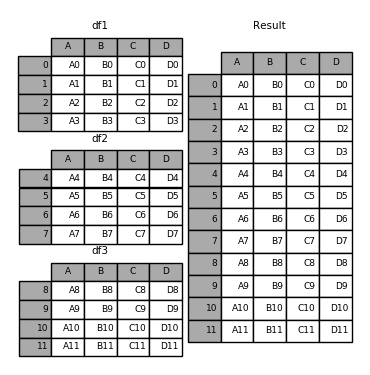

<img width = '400px' src="images/lesson_3/merging_concat_basic.png">

In [ ]:
df_new_ = pd.concat([df_a, df_b],axis = 1)
df_new_

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,NaN,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN,NaN
2,3,Allen,Ali,4,Billy,Bonder
3,4,Alice,Aoni,5,Brian,Black
4,5,Ayoung,Atiches,6,Bran,Balwner
5,NaN,NaN,NaN,7,Bryce,Brice
6,NaN,NaN,NaN,8,Betty,Btisan


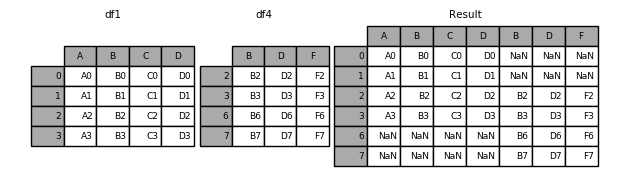

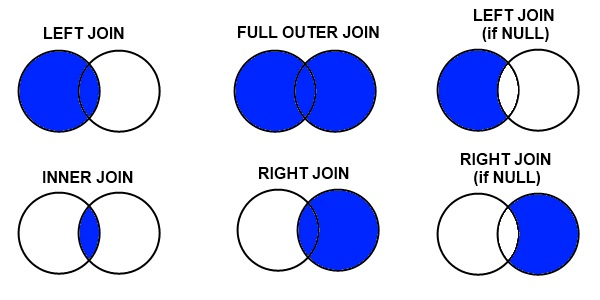

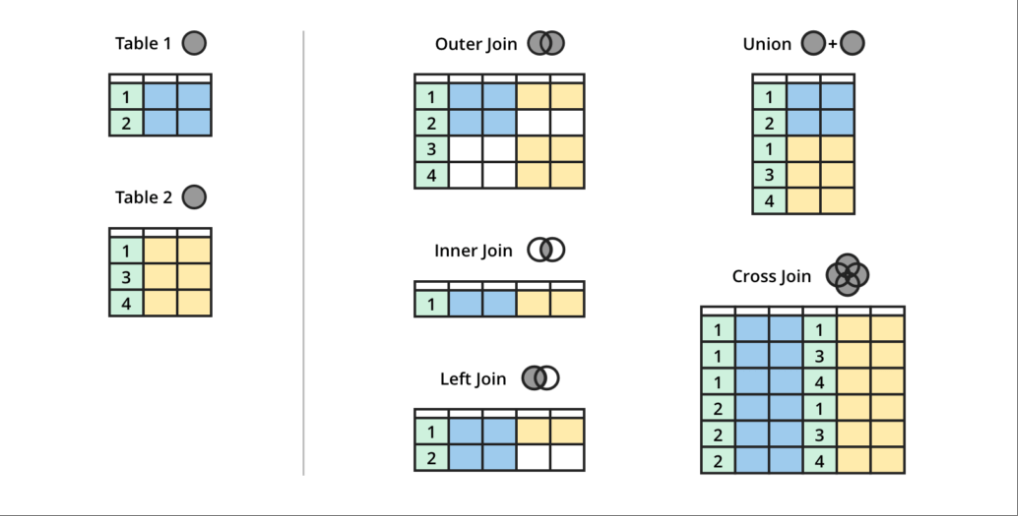

<img width = '800px' src="images/lesson_3/merging_concat_axis1.png">

<img width = '800px' src="images/lesson_3/join-types-merge-names.jpg">

<img width = '800px' src="images/lesson_3/join2.png">

In [ ]:
#Concat, но только с помощью атрибута "inner"
df_new_ = pd.concat([df_a, df_b],axis = 1,join='inner')
df_new_

,subject_id,first_name,last_name,subject_id,first_name,last_name
2,3,Allen,Ali,4,Billy,Bonder
3,4,Alice,Aoni,5,Brian,Black
4,5,Ayoung,Atiches,6,Bran,Balwner


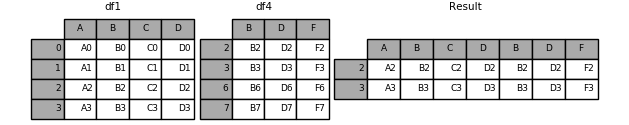

<img width = '800px' src="images/lesson_3/merging_concat_axis1_inner.png">

**Append** - частный случай метода **Concat** с параметрами (axis=0, join='outer').

In [ ]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
2,4,Billy,Bonder
3,5,Brian,Black
4,6,Bran,Balwner
5,7,Bryce,Brice
6,8,Betty,Btisan


Метод **Join** основан на объединении таблиц через индексы (способ объединения указывается с помощью параметра how = ['left','right','inner','couter']).

In [ ]:
# df_a.join(df_b,how = 'left')
df_a.join(df_b,rsuffix='_right_table',how = 'left')

,subject_id,first_name,last_name,subject_id_right_table,first_name_right_table,last_name_right_table
0,1,Alex,Anderson,NaN,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN,NaN
2,3,Allen,Ali,4,Billy,Bonder
3,4,Alice,Aoni,5,Brian,Black
4,5,Ayoung,Atiches,6,Bran,Balwner


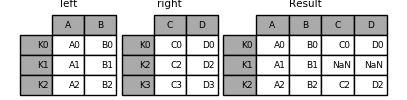

<img width = '800px' src="images/lesson_3/merging_join.png">

**Merge** используется для объединения таблиц по любым колонкам с помощью методов left_on и right_on.

In [ ]:
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
2,4,Billy,Bonder
3,5,Brian,Black
4,6,Bran,Balwner
5,7,Bryce,Brice
6,8,Betty,Btisan


In [ ]:
#Стоит обратить внимание, что колонка subject_id не дублируется в новой таблице
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


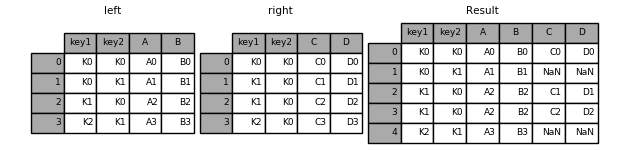<img width = '800px' src="images/lesson_3/merging_merge_on_key_left.png">

In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


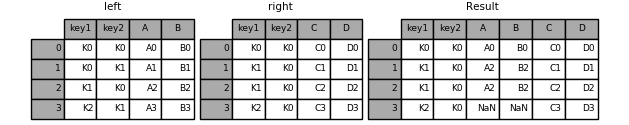<img width = '800px' src="images/lesson_3/merging_merge_on_key_right.png">

In [ ]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
2,3,Allen,Ali,4,Billy,Bonder
3,4,Alice,Aoni,5,Brian,Black
4,5,Ayoung,Atiches,6,Bran,Balwner
